# Preprocess_v1

In [1]:
import pandas as pd
from transformers import pipeline
from tqdm import tqdm
import glob

# Ambil semua file CSV dari dua folder
csv_files_1 = glob.glob("reviews_1/*.csv")
csv_files_2 = glob.glob("reviews_2/*.csv")  # Ganti dengan nama folder tambahanmu

# Gabungkan daftar file dari kedua folder
csv_files = csv_files_1 + csv_files_2

# Gabungkan semua CSV jadi satu DataFrame
df_list = [pd.read_csv(file) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)

print(f"Total data: {len(df)} baris")

Couldn't import dot_parser, loading of dot files will not be possible.
Total data: 11647 baris


In [2]:
# Ganti NaN jadi string kosong, lalu hitung panjangnya
df['char_count'] = df['Review'].fillna("").apply(len)

# Hitung rata-rata
average_chars = df['char_count'].mean()

print(f"Rata-rata karakter per review: {average_chars:.2f}")


Rata-rata karakter per review: 372.48


In [3]:
# Gabungkan semua CSV jadi satu DataFrame
df_list = [pd.read_csv(file) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)

# Pastikan kolom Reviews aman (ganti NaN ke string kosong)
df['char_count'] = df['Review'].fillna("").apply(len)

# Hitung statistik
average_chars = df['char_count'].mean()
min_chars = df['char_count'].min()
mode_chars = df['char_count'].mode()[0]  # mode() bisa mengembalikan banyak nilai, ambil satuan pertama

max_chars = df['char_count'].max()



# Print hasil
print(f"Rata-rata karakter per review : {average_chars:.2f}")
print(f"Jumlah karakter terbanyak dalam satu review: {max_chars}")
print(f"Nilai terkecil karakter review : {min_chars}")

Rata-rata karakter per review : 372.48
Jumlah karakter terbanyak dalam satu review: 7988
Nilai terkecil karakter review : 0


In [4]:
# 2. Pastikan kolom 'Reviews' ada dan tidak berisi NaN
df = df.dropna(subset=["Review"])

# 3. Ambil 10 sampel acak
sample_reviews = df["Review"].sample(n=10, random_state=42).reset_index(drop=True)

# 4. Tampilkan hasil
print(sample_reviews)

0    My opinion of the game after playing a full ga...
1    Didn't like this one, felt like none of my dec...
2    Doing accurate ballistics in VR is a tough pro...
3                                                    .
4    As a tomb raider fan I can say this offers an ...
5    Unique and emergent gameplay where strategy AN...
6                                         BUYYYY IT!!!
7                                                 good
8    An okay game where combat is based on cards. R...
9    Well, playing poker with my favorite game char...
Name: Review, dtype: object


In [5]:
import ssl
import nltk

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Sekarang bisa download
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /Users/divaoncom/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/divaoncom/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
import glob
import re
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from langdetect import detect

# Unduh resource NLTK jika belum
nltk.download('punkt')
nltk.download('stopwords')

# Load stopwords bahasa Inggris
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Kamus normalisasi
normalization_dict = {
    "u": "you", "r": "are", "ur": "your", "pls": "please", "plz": "please",
    "thx": "thanks", "ty": "thank you", "btw": "by the way", "lol": "laughing out loud",
    "lmao": "laughing my ass off", "omg": "oh my god", "wtf": "what the fuck",
    "idk": "i do not know", "imo": "in my opinion", "imho": "in my humble opinion",
    "afaik": "as far as i know", "brb": "be right back", "bbl": "be back later",
    "gg": "good game", "ez": "easy", "nerf": "weaken", "buff": "strengthen",
    "noob": "newbie", "grind": "repetitive task", "op": "overpowered",
    "laggy": "slow connection", "gitgud": "get good", "f2p": "free to play",
    "p2w": "pay to win", "dlc": "downloadable content", "npc": "non player character",
    "fps": "frames per second", "afk": "away from keyboard", "xp": "experience points",
    "lvl": "level", "bossfight": "boss fight", "rng": "random number generator",
    "camping": "staying in one spot", "gank": "ambush attack", "re": "regarding",
    "af": "as fuck", "xd": "bad", "f": "fuck", "ive": "i have", "rp": "roleplay",
    "fckin": "fucking", "tl": "too long", "dr": "didnt read", "lcg": "living card game", 
    "stori": "story", "differ": "different"
}

# Fungsi normalisasi kata
def normalize(text):
    return ' '.join([normalization_dict.get(word, word) for word in text.split()])

# Fungsi mengurangi kata yang berulang-ulang
def reduce_elongated_words(text):
    return re.sub(r'(.)\1{2,}', r'\1', text)

# Fungsi preprocessing lengkap
def preprocess(text):
    try:
        if detect(text) != 'en':
            return None
    except:
        return None

    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = reduce_elongated_words(text)
    text = normalize(text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

# Ambil semua file CSV dari dua folder
csv_files = glob.glob("SteamReviews/*.csv") + glob.glob("SteamReviews_2/*.csv")
df_list = [pd.read_csv(file) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)

# Validasi kolom
if 'Review' not in df.columns:
    raise ValueError("Kolom 'Review' tidak ditemukan di file CSV")

# Terapkan preprocessing dengan progress bar
tqdm.pandas()
df['Cleaned_Review'] = df['Review'].astype(str).progress_apply(preprocess)
df = df.dropna(subset=['Cleaned_Review'])

print(f"Total data setelah preprocessing: {len(df)} baris")

# Simpan hasil ke CSV
df.to_csv("PreprocessedReviews.csv", index=False)
# df[['Cleaned_Review']].to_csv("CleanedReviewsOnly.csv", index=False)


[nltk_data] Downloading package punkt to /Users/divaoncom/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/divaoncom/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 11536/11536 [00:37<00:00, 309.04it/s]


Total data setelah preprocessing: 9588 baris


In [23]:
df[['UserID', 'Cleaned_Review']].to_csv("SteamID_and_CleanedReview.csv", index=False)

In [24]:
df = pd.read_csv("SteamID_and_CleanedReview.csv")

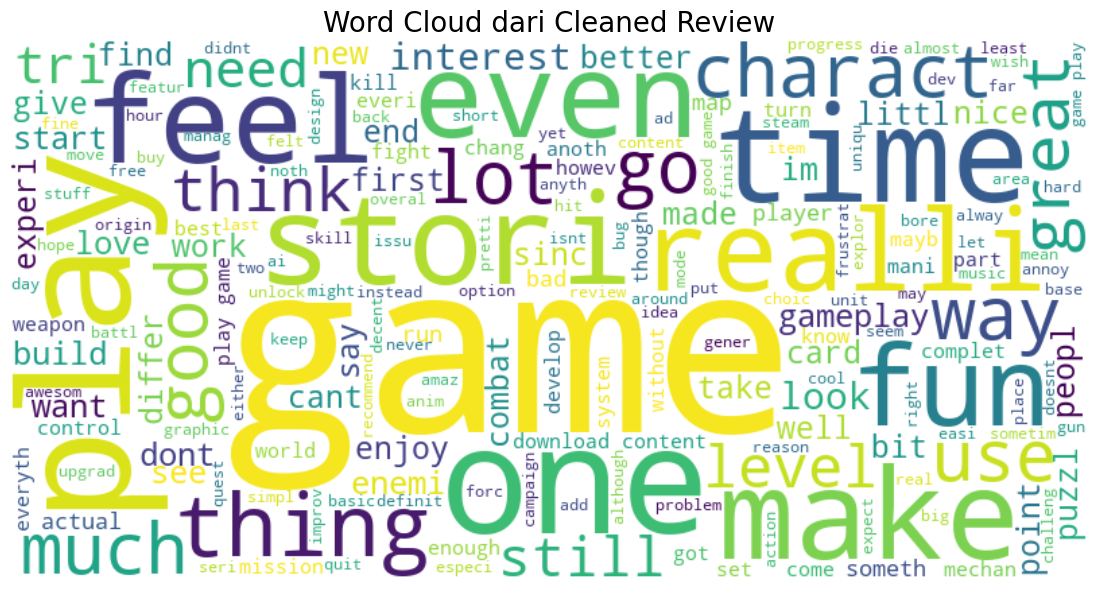

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pastikan semuanya string, dan hilangkan nilai NaN
all_text = ' '.join(df['Cleaned_Review'].dropna().astype(str))

# Buat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Tampilkan
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud dari Cleaned Review", fontsize=20)
plt.show()

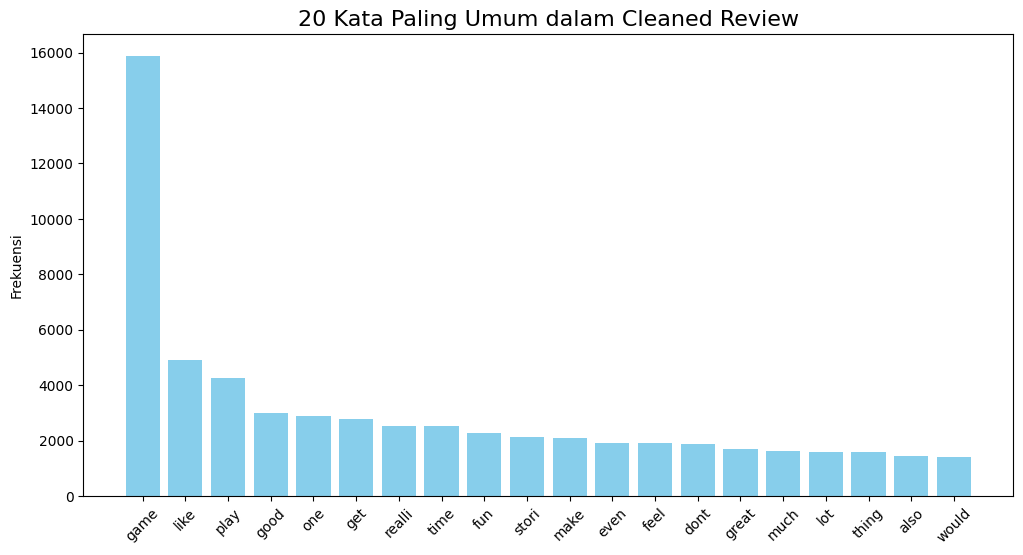

In [27]:
from collections import Counter

# Hitung frekuensi kata
words = all_text.split()
word_freq = Counter(words)
common_words = word_freq.most_common(20)

# Visualisasikan
words, freqs = zip(*common_words)
plt.figure(figsize=(12, 6))
plt.bar(words, freqs, color='skyblue')
plt.xticks(rotation=45)
plt.title("20 Kata Paling Umum dalam Cleaned Review", fontsize=16)
plt.ylabel("Frekuensi")
plt.show()


In [11]:
# Tampilkan 5 sampel sebelum dan sesudah preprocessing
sample = df[['Review', 'Cleaned_Review']].sample(5, random_state=42)
print(sample.to_string(index=False))


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Review                   

# Preprocess v2

In [14]:
import pandas as pd
from transformers import pipeline
from tqdm import tqdm
import glob

# Ambil semua file CSV dari dua folder
csv_files_1 = glob.glob("reviews_1/*.csv")
csv_files_2 = glob.glob("reviews_2/*.csv")  # Ganti dengan nama folder tambahanmu

# Gabungkan daftar file dari kedua folder
csv_files = csv_files_1 + csv_files_2

# Gabungkan semua CSV jadi satu DataFrame
df_list = [pd.read_csv(file) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)

print(f"Total data: {len(df)} baris")

Total data: 11647 baris


In [15]:
# Ganti NaN jadi string kosong, lalu hitung panjangnya
df['char_count'] = df['Review'].fillna("").apply(len)

# Hitung rata-rata
average_chars = df['char_count'].mean()

print(f"Rata-rata karakter per review: {average_chars:.2f}")


Rata-rata karakter per review: 372.27


In [16]:
# Gabungkan semua CSV jadi satu DataFrame
df_list = [pd.read_csv(file) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)

# Pastikan kolom Reviews aman (ganti NaN ke string kosong)
df['char_count'] = df['Review'].fillna("").apply(len)

# Hitung statistik
average_chars = df['char_count'].mean()
min_chars = df['char_count'].min()
mode_chars = df['char_count'].mode()[0]  # mode() bisa mengembalikan banyak nilai, ambil satuan pertama

max_chars = df['char_count'].max()



# Print hasil
print(f"Rata-rata karakter per review : {average_chars:.2f}")
print(f"Jumlah karakter terbanyak dalam satu review: {max_chars}")
print(f"Nilai terkecil karakter review : {min_chars}")

Rata-rata karakter per review : 372.27
Jumlah karakter terbanyak dalam satu review: 7988
Nilai terkecil karakter review : 0


# prepos

In [17]:
# 2. Pastikan kolom 'Reviews' ada dan tidak berisi NaN
df = df.dropna(subset=["Review"])

# 3. Ambil 10 sampel acak
sample_reviews = df["Review"].sample(n=10, random_state=42).reset_index(drop=True)

# 4. Tampilkan hasil
print(sample_reviews)

0                                                 Nope
1    Personally, I just can't get into the way the ...
2    its only possible to play with a mac user if y...
3    MEH, big meh. Bland storyline, Japanese melodr...
4        I'm going to get you back for this someday XX
5    Really fun game, kinda bad if you want a scare...
6    This game has the best landscapes of all time....
7    Bulletstorm: Review Developer: people can fly,...
8    It's really great with very diverse war storie...
9    Haven't try co-op yet, but single-player exper...
Name: Review, dtype: object


In [18]:
import ssl
import nltk

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Sekarang bisa download
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /Users/divaoncom/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/divaoncom/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
import pandas as pd
import glob, re
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from langdetect import detect

# ── unduh resource NLTK (jalan sekali saja) ──
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# ── inisialisasi objek bantu ──
stop_words   = set(stopwords.words('english'))
lemmatizer   = WordNetLemmatizer()

# ── mem-load seluruh CSV ──
csv_files = glob.glob('reviews_1/*.csv') + glob.glob('reviews_2/*.csv')
if not csv_files:
    raise FileNotFoundError('Tidak ada file .csv di SteamReviews/ atau SteamReviews_2/')
df_list  = [pd.read_csv(f) for f in csv_files]
df       = pd.concat(df_list, ignore_index=True)

# pastikan kolom 'Review' ada
if 'Review' not in df.columns:
    raise ValueError("Kolom 'Review' tidak ditemukan.")
tqdm.pandas()


[nltk_data] Downloading package punkt to /Users/divaoncom/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/divaoncom/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/divaoncom/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/divaoncom/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [20]:
def case_fold(text: str) -> str:
    return text.lower()

df['Case_Folded'] = df['Review'].astype(str).progress_apply(case_fold)
df[['Review', 'Case_Folded']].head()


100%|██████████| 11647/11647 [00:00<00:00, 503370.07it/s]


,Review,Case_Folded
0,Better than Naruto,better than naruto
1,I am offensive and I find this game Indian.,i am offensive and i find this game indian.
2,1) Game breakin glitches. 2) Out dated physics...,1) game breakin glitches. 2) out dated physics...
3,Too much of hentai.,too much of hentai.
4,"Dude, say whatever you wanna say, but remember...","dude, say whatever you wanna say, but remember..."


In [21]:
elong_pattern = re.compile(r'(.)\1{2,}')          # huruf berulang ≥3

def cleanse(text: str):
    try:
        if detect(text) != 'en':
            return None          # abaikan jika bukan bahasa Inggris
    except:
        return None

    text = re.sub(r'http\S+|www\S+', '', text)     # URL
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)       # non-huruf
    text = elong_pattern.sub(r'\1', text)          # kata berulang  
    text = re.sub(r'\s+', ' ', text).strip()       # spasi ganda → 1
    return text.lower()

df['Cleansed'] = df['Case_Folded'].progress_apply(cleanse)
df = df.dropna(subset=['Cleansed'])                # buang baris None
df[['Review', 'Cleansed']].head()


100%|██████████| 11647/11647 [01:08<00:00, 171.24it/s]


,Review,Cleansed
0,Better than Naruto,better than naruto
1,I am offensive and I find this game Indian.,i am offensive and i find this game indian
2,1) Game breakin glitches. 2) Out dated physics...,game breakin glitches out dated physics full o...
3,Too much of hentai.,too much of hentai
4,"Dude, say whatever you wanna say, but remember...",dude say whatever you wanna say but remember i...


In [24]:
normalization_dict = {
    "u": "you", "r": "are", "ur": "your", "pls": "please", "plz": "please",
    "thx": "thanks", "ty": "thank you", "btw": "by the way", "lol": "laughing out loud",
    "lmao": "laughing my ass off", "omg": "oh my god", "wtf": "what the fuck",
    "idk": "i do not know", "imo": "in my opinion", "imho": "in my humble opinion",
    "afaik": "as far as i know", "brb": "be right back", "bbl": "be back later",
    "gg": "good game", "ez": "easy", "nerf": "weaken", "buff": "strengthen",
    "noob": "newbie", "grind": "repetitive task", "op": "overpowered",
    "laggy": "slow connection", "gitgud": "get good", "f2p": "free to play",
    "p2w": "pay to win", "dlc": "downloadable content", "npc": "non player character",
    "fps": "frames per second", "afk": "away from keyboard", "xp": "experience points",
    "lvl": "level", "bossfight": "boss fight", "rng": "random number generator",
    "camping": "staying in one spot", "gank": "ambush attack", "re": "regarding",
    "af": "as fuck", "xd": "bad", "f": "fuck", "ive": "i have", "rp": "roleplay",
    "fckin": "fucking", "tl": "too long", "dr": "didnt read", "lcg": "living card game",
    "stori": "story", "differ": "different"
}

def normalize(text: str):
    return ' '.join(normalization_dict.get(w, w) for w in text.split())

df['Normalized'] = df['Cleansed'].progress_apply(normalize)
df[['Review', 'Normalized']].head()


100%|██████████| 9542/9542 [00:00<00:00, 83483.45it/s]


,Review,Normalized
0,Better than Naruto,better than naruto
1,I am offensive and I find this game Indian.,i am offensive and i find this game indian
2,1) Game breakin glitches. 2) Out dated physics...,game breakin glitches out dated physics full o...
3,Too much of hentai.,too much of hentai
4,"Dude, say whatever you wanna say, but remember...",dude say whatever you wanna say but remember i...


In [25]:
def tokenize(text: str):
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    return tokens          # list token (biar mudah dilihat)

df['Tokens'] = df['Normalized'].progress_apply(tokenize)
df[['Review', 'Tokens']].head()


100%|██████████| 9542/9542 [00:01<00:00, 6089.46it/s]


,Review,Tokens
0,Better than Naruto,"[better, naruto]"
1,I am offensive and I find this game Indian.,"[offensive, find, game, indian]"
2,1) Game breakin glitches. 2) Out dated physics...,"[game, breakin, glitches, dated, physics, full..."
3,Too much of hentai.,"[much, hentai]"
4,"Dude, say whatever you wanna say, but remember...","[dude, say, whatever, wan, na, say, remember, ..."


In [26]:
def lemmatize_tokens(tokens):
    lemmas = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(lemmas)

df['Cleaned_Review'] = df['Tokens'].progress_apply(lemmatize_tokens)
df[['Review', 'Cleaned_Review']].head()


100%|██████████| 9542/9542 [00:00<00:00, 10750.49it/s]


,Review,Cleaned_Review
0,Better than Naruto,better naruto
1,I am offensive and I find this game Indian.,offensive find game indian
2,1) Game breakin glitches. 2) Out dated physics...,game breakin glitch dated physic full yr old g...
3,Too much of hentai.,much hentai
4,"Dude, say whatever you wanna say, but remember...",dude say whatever wan na say remember indie ga...


In [28]:
final_cols = ['UserID', 'Game', 'Genre', 'Review', 'Cleaned_Review']
missing    = [c for c in final_cols if c not in df.columns]
if missing:
    raise ValueError(f'Kolom hilang: {missing}')

df[final_cols].to_csv('PreprocessedReviews.csv', index=False)
print('File PreprocessedReviews.csv tersimpan 🚀')


File PreprocessedReviews.csv tersimpan 🚀


# prepros_v2